## 2. Data Exploration and Preprocessing
### **Task 2: Data Preprocessing**

### **Handling Missing Values**

In [2]:
import pandas as pd
from sklearn.impute import SimpleImputer

# Load data
df = pd.read_csv("../data/boston_housing.csv")

# Identify columns with missing values
print("Missing values before imputation:")
print(df.isnull().sum())

# Impute numerical features with median
num_cols = df.select_dtypes(include=['float64', 'int64']).columns
num_imputer = SimpleImputer(strategy='median')
df[num_cols] = num_imputer.fit_transform(df[num_cols])

print("\nMissing values after imputation:")
print(df.isnull().sum())

Missing values before imputation:
CRIM       20
ZN         20
INDUS      20
CHAS       20
NOX         0
RM          0
AGE        20
DIS         0
RAD         0
TAX         0
PTRATIO     0
B           0
LSTAT      20
MEDV        0
dtype: int64

Missing values after imputation:
CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64


### **Handling Outliers**

In [3]:
import numpy as np 

def cap_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q2 = df[column].quantile(0.75)
    IQR = Q2 -Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q2 + 1.5 * IQR
    df[column] = np.where(df[column] > upper_bound, upper_bound, np.where(df[column] < lower_bound, lower_bound, df[column]))
    return df

# Capping Outliers 
for col in num_cols:
    df = cap_outliers(df, col)

Checking handled outliers

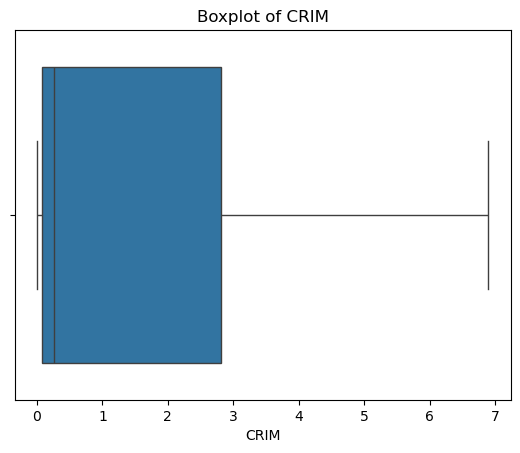

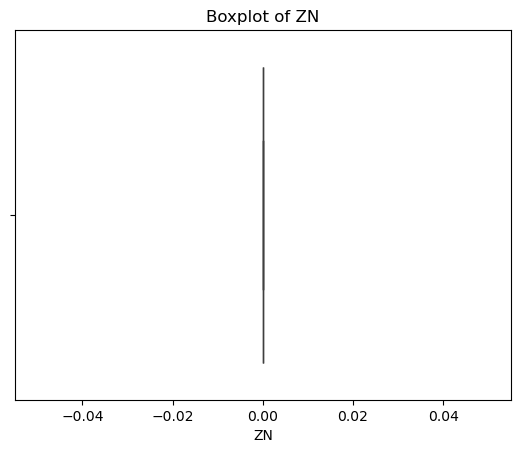

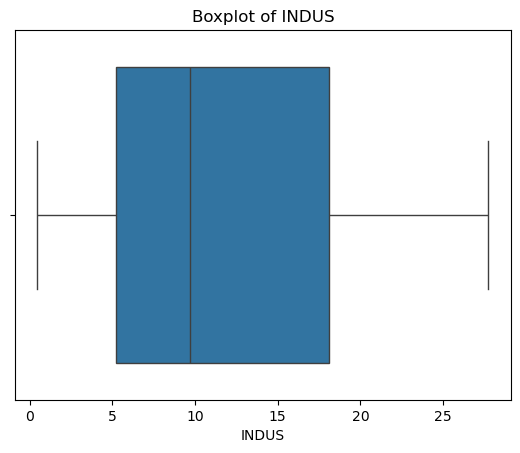

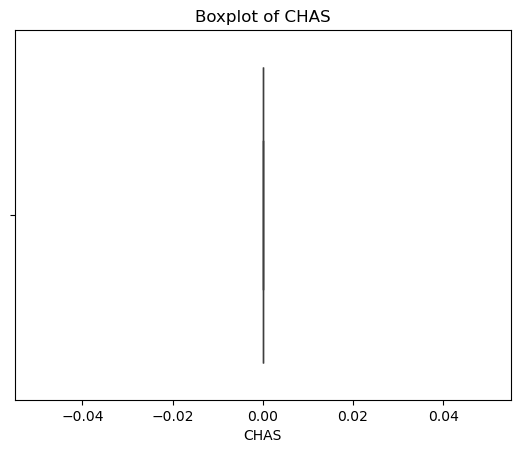

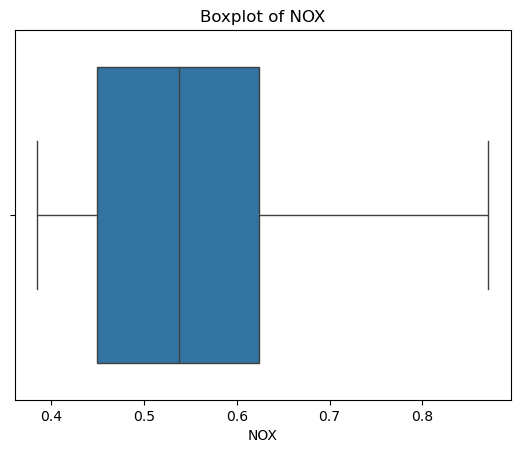

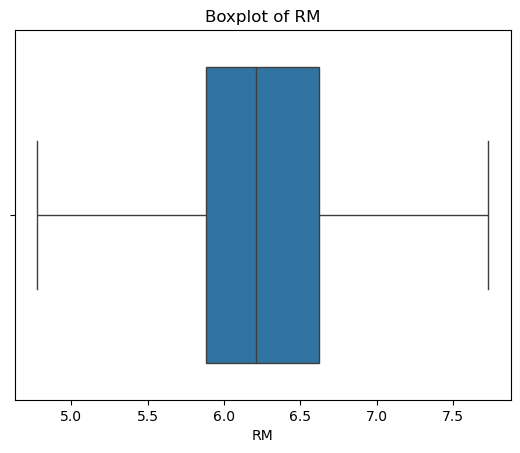

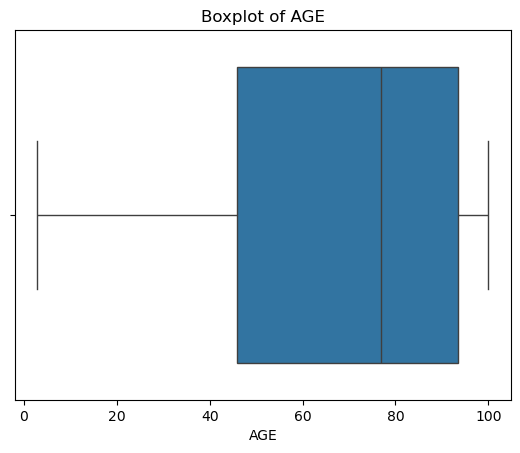

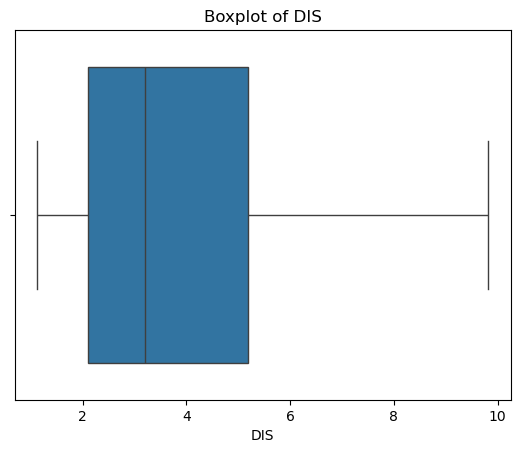

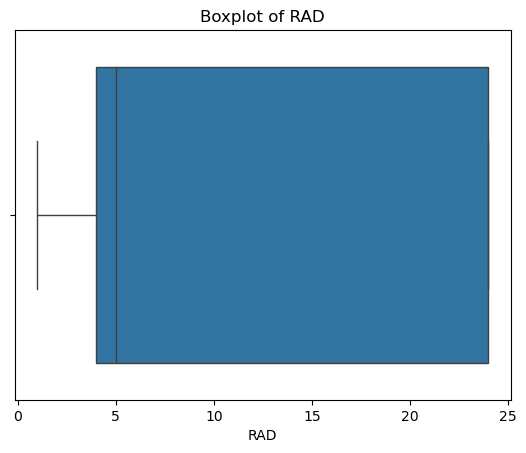

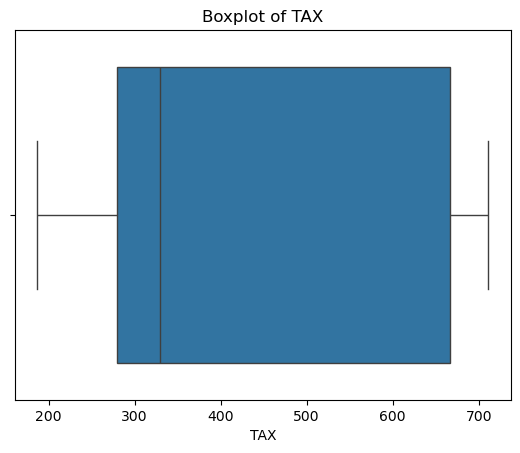

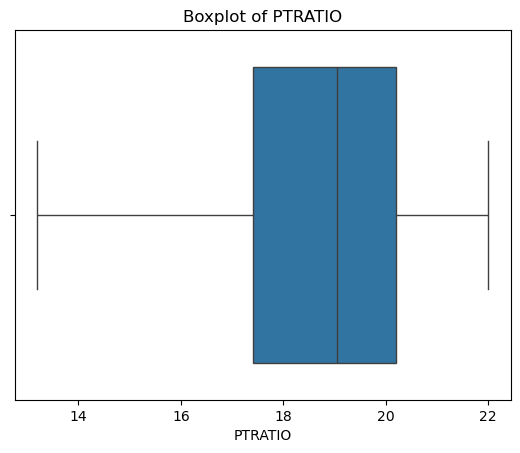

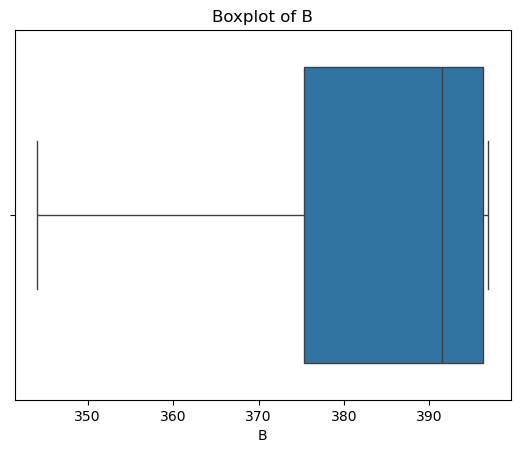

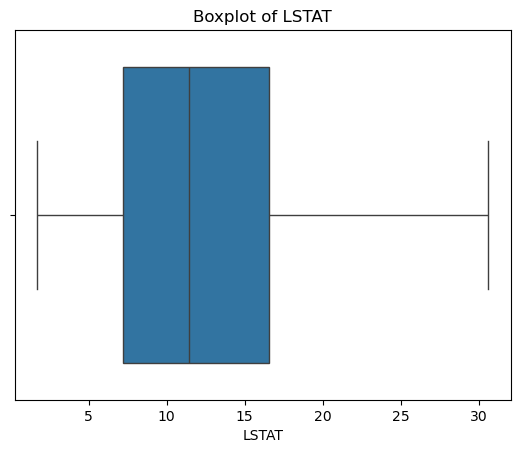

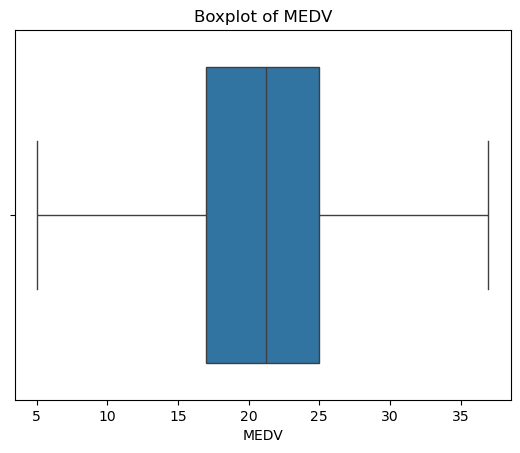

In [4]:
import matplotlib.pyplot as plt 
import seaborn as sns 

# box plot of top 6 features
for i in range(len(num_cols)):
    sns.boxplot(x=df[num_cols[i]])
    plt.title(f"Boxplot of {num_cols[i]}")
    plt.show()

### **Encode Categorical Variables**

In [5]:
# Concer CHAS and RAD to categorical
df['CHAS'] = df['CHAS'].astype('category')
df['RAD'] = df['RAD'].astype("category")

# One-hot encode RAD
df = pd.get_dummies(df, columns = ['RAD'], prefix='RAD', drop_first=True)

print("Data types after conversion:")
print(df.dtypes)

print("Dataset after conversion:")
df.head(5)



Data types after conversion:
CRIM         float64
ZN           float64
INDUS        float64
CHAS        category
NOX          float64
RM           float64
AGE          float64
DIS          float64
TAX          float64
PTRATIO      float64
B            float64
LSTAT        float64
MEDV         float64
RAD_2.0         bool
RAD_3.0         bool
RAD_4.0         bool
RAD_5.0         bool
RAD_6.0         bool
RAD_7.0         bool
RAD_8.0         bool
RAD_24.0        bool
dtype: object
Dataset after conversion:


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,TAX,PTRATIO,...,LSTAT,MEDV,RAD_2.0,RAD_3.0,RAD_4.0,RAD_5.0,RAD_6.0,RAD_7.0,RAD_8.0,RAD_24.0
0,0.00632,0.0,2.31,0.0,0.538,6.575,65.2,4.0900,296.0,15.3,...,4.98,24.0,False,False,False,False,False,False,False,False
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,242.0,17.8,...,9.14,21.6,True,False,False,False,False,False,False,False
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,242.0,17.8,...,4.03,34.7,True,False,False,False,False,False,False,False
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,222.0,18.7,...,2.94,33.4,False,True,False,False,False,False,False,False
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,222.0,18.7,...,11.43,36.2,False,True,False,False,False,False,False,False


### **Normalize/Standardize Numerical Features**

In [6]:
from sklearn.preprocessing import StandardScaler

# Separate features and target
X = df.drop('MEDV', axis=1)
y = df['MEDV']

# Identify numerical features to scale (exclude categorical features)
scale_cols = [col for col in X.select_dtypes(include=['float64', 'int64']).columns if col not in ['CHAS'] and not col.startswith('RAD_')]

# Standardize features
scaler = StandardScaler()
X_scaled = X.copy()
X_scaled[scale_cols] = scaler.fit_transform(X[scale_cols])

print("Scaled features (sample):")
print(X_scaled.head())

Scaled features (sample):
       CRIM   ZN     INDUS CHAS       NOX        RM       AGE       DIS  \
0 -0.688167  0.0 -1.301706  0.0 -0.144217  0.475982 -0.132771  0.148015   
1 -0.680160  0.0 -0.591052  0.0 -0.740262  0.231390  0.366141  0.572202   
2 -0.680167  0.0 -0.591052  0.0 -0.740262  1.444822 -0.282080  0.572202   
3 -0.678229  0.0 -1.321115  0.0 -0.835284  1.147817 -0.839258  1.101820   
4 -0.664236  0.0 -1.321115  0.0 -0.835284  1.384468 -0.533356  1.101820   

        TAX   PTRATIO         B     LSTAT  RAD_2.0  RAD_3.0  RAD_4.0  RAD_5.0  \
0 -0.666608 -1.477181  0.786988 -1.116310    False    False    False    False   
1 -0.987329 -0.309941  0.786988 -0.507148     True    False    False    False   
2 -0.987329 -0.309941  0.573183 -1.255422     True    False    False    False   
3 -1.106115  0.110265  0.667741 -1.415034    False     True    False    False   
4 -1.106115  0.110265  0.786988 -0.171816    False     True    False    False   

   RAD_6.0  RAD_7.0  RAD_8.0  RAD_24

### **Split Data into Train/Test sets**

In [7]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

print(f"Train shape: {X_train.shape} \nTest Shape: {X_test.shape}")

Train shape: (404, 20) 
Test Shape: (102, 20)


### **Saving the processed data**



In [8]:
processed_data = {
    'X_train': X_train,
    'X_test': X_test,
    'y_train': y_train,
    'y_test': y_test,
    'scaler': scaler
}

import joblib
joblib.dump(processed_data, '../data/processed_data.pkl')
print("Data saved to ../data/processed_data.pkl")

Data saved to ../data/processed_data.pkl
